In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Este ejercicion se resolvio con arboles y bosques
dataset = pd.read_csv("C:/Users/Vic/Documents/CursoMachineLearning/Dataset/Position_Salaries/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
x = dataset.iloc[:,1:2].values #Level
y = dataset.iloc[:,2:3].values #Salary

In [18]:
#ESCALADO
#Normalmente se escala X. pero en regresion es necesario escalar Y.
#En regresion se necesita predecir.
#Escalar X,Y
#En regresion hay que aproximarse al resultado lo mas que se pueda. 

from sklearn.preprocessing import StandardScaler

In [19]:
#RARAVEZ se escala Y
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
#En Y reshape depende de la version de anaconda.
#-1,1 es una tecnica para definir el rango de Y
#y = sc_y.fit_transform(y.reshape(-1,1)) #para alguna versiones
y = sc_y.fit_transform(y)

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
#pd.DataFrame(x).head()
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [22]:
#pd.DataFrame(y).head()
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [24]:
from sklearn.svm import SVR

In [25]:
#kernel=rbf. algoritmo gaussiano.
regresion = SVR(kernel="rbf")
regresion.fit(x,y)

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [28]:
#Prediccion.
#Los datos estan estandarizados, usar transform.
y_pred = regresion.predict(sc_x.transform([[6.5]])) #array([0.01150915])#170k (prof)
#y_pred = regresion.predict(sc_x.fit_transform([[6.5]])) #array([-0.41640813])#130k (vic)
y_pred

array([-0.27861589])

In [31]:
#Obtener la invesa de un valor escalado.
y_pred_inversa = sc_y.inverse_transform(y_pred)
y_pred_inversa

#El empleado quiere ganar 160k
#Arbol = 150k
#Bosque = 167 k
#SVR =170k

array([170370.0204065])

In [33]:
regresion.score(x,y) #0.75%

0.7516001070620798

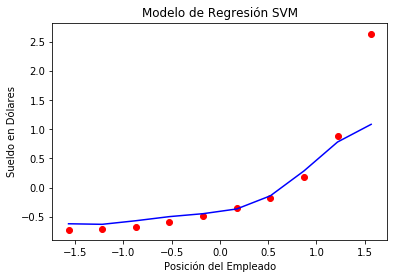

In [32]:
plt.scatter(x,y,color="red")
plt.plot(x,regresion.predict(x),color="blue")
plt.title("Modelo de Regresión SVM")
plt.xlabel("Posición del Empleado")
plt.ylabel("Sueldo en Dólares")
plt.show()


#Arboles o SVM-Regresion?
#R.
#Los bosques aleatorios, es adecuado para trabajar con multiclase
#SVM es adecuado para trabajar con dos clases.
#Cross validation permite seleccionar un modelo.